# Chapter 5: Support Vector Machines

## Section 1: Linear SVM Classification

### 1.1 Soft Margin Classification

In [3]:
# import the libs

import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [4]:
# load the iris dataset

iris = datasets.load_iris()

In [5]:
# create training instances and training labels

X = iris["data"][:, (2, 3)]
y = (iris["target"] == 2).astype(np.float64)

In [6]:
# create the model with preprocessing pipeline

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])

In [8]:
# fit

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [10]:
# predict a new instance (5.5, 1.7)

svm_clf.predict([[5.5, 1.7]])

array([1.])

## Section 2: Nonlinear SVM

In [17]:
# import the libs

from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC

In [18]:
# create the training instances and training labels

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

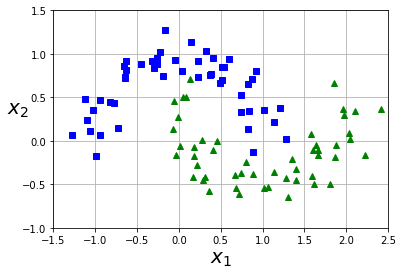

In [22]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [19]:
# create the model with preprocessing pipeline

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss='hinge', random_state=42))
])

In [20]:
# fit

polynomial_svm_clf.fit(X, y)

/home/michael/MachineLearning/Chapter5/env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

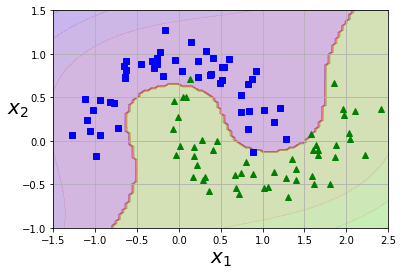

In [24]:
from matplotlib import pyplot as plt

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])


plt.show()

### Polynomial Kernel

In [27]:
# import the lib
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_moons

# load the dataset and create the training instances and labels
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# create the model with preprocessing pipeline
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

# fit
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

### RBF Kernel

In [29]:
# import the libs
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_moons

# load the dataset and create the training instances and labels
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# create the model with preprocessing pipeline
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])

# fit
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

## Section 3 SVM Regression

In [1]:
# import the libs

import numpy as np
from sklearn.svm import LinearSVR
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# create a random training set

np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1) # uniform distribution
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [3]:
# preprocess the training instances 

scaler = StandardScaler()
scaler.fit_transform(X, y=y)

array([[-0.2496113 ],
       [ 1.76512621],
       [ 1.00031561],
       [ 0.53407475],
       [-1.01372644],
       [-1.01381079],
       [-1.35618083],
       [ 1.46951733],
       [ 0.54266462],
       [ 0.91666857],
       [-1.48730589],
       [ 1.83224825],
       [ 1.35155967],
       [-0.8167878 ],
       [-0.92348815],
       [-0.91796489],
       [-0.49542545],
       [ 0.2756577 ],
       [-0.04888068],
       [-0.54092903],
       [ 0.58021232],
       [-1.07150948],
       [-0.53772773],
       [-0.2782087 ],
       [ 0.03547831],
       [ 1.18627988],
       [-0.8610753 ],
       [ 0.23886491],
       [ 0.51224134],
       [-1.39685922],
       [ 0.56514817],
       [-0.96300438],
       [-1.33181553],
       [ 1.75873146],
       [ 1.81728978],
       [ 1.26747928],
       [-0.49412632],
       [-1.2177497 ],
       [ 0.8333076 ],
       [-0.02018118],
       [-1.13254745],
       [ 0.17222548],
       [-1.43903665],
       [ 1.62038204],
       [-0.65439565],
       [ 0

In [4]:
# create and fit models with different epsilons

svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

LinearSVR(epsilon=0.5, random_state=42)

In [5]:
# define a function for the index of support vectors and the points out of the margin

def find_support_vectors(svm_reg, X, y):
    
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    
    return np.argwhere(off_margin)

In [6]:
# run the function for the 2 svm regression models to find the support vectors and the points out of margin

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

In [13]:
# obtain a specific point for annotating the epsilon

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

In [14]:
# define the plot function

def plot_svm_regression(svm_reg, X, y, axes):
    
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors="#FFAAAA")
    
    plt.plot(X, y, "bo")
    
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)    

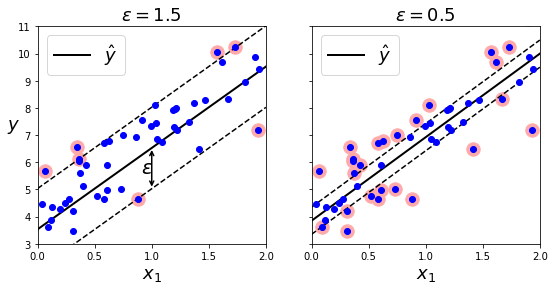

In [15]:
# present the plot

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])

plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])

plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)

plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)

plt.show()